In [ ]:
!pip install -q tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 44kB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 4.3MB 40.8MB/s 
     |████████████████████████████████| 501kB 40.0MB/s 


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc1


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(777) #seed 고정
tf.random.set_seed(777)


x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0],[1],[1],[0]],dtype=np.float32)
#xor data

dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data)) #dataset 지정
learning_rate = 0.01 #학습률

In [ ]:
h1_w23 = tf.random.normal(shape=(2,3), mean=0, stddev=1.0, dtype=tf.float32)
h1_b13 = tf.zeros(shape=(1,3))
w1 = tf.Variable(h1_w23)
b1 = tf.Variable(h1_b13)

o_w31 = tf.random.normal(shape=(3,1),mean=0,stddev=1.0,dtype=tf.float32)
o_b11 = tf.zeros(shape=(1,3))
w2 = tf.Variable(o_w31)
b2 = tf.Variable(o_b11)
# 2 - 3 - 1 구조

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#최적화 (Adam)

In [ ]:
def network(x_data,y_data): #2 - 3 - 1 구조 계산
  a1 = tf.sigmoid(tf.matmul(x_data,w1) + b1)
  a2 = tf.sigmoid(tf.matmul(a1,w2) + b2)
  return a2

In [ ]:
def loss_function(yhat,y_data): #손실 함수
  return tf.reduce_mean(-y_data*tf.math.log(yhat) - (1-y_data)*tf.math.log(1-yhat))

In [ ]:
def grad(x_data, y_data): #경사 갱신
  with tf.GradientTape() as tape:
    yhat = network(x_data,y_data)
    loss = loss_function(yhat,y_data)
  return tape.gradient(loss, [w1,w2,b1,b2])

In [ ]:
def accuracy(yhat, y_data): #정확도 계산
  thresholding = yhat > 0.5
  thresholding = tf.cast(thresholding, tf.float32)
  prediction = tf.cast(tf.equal(thresholding,y_data), tf.float32)
  accuracy = tf.reduce_mean(prediction)
  return accuracy

In [ ]:
Loss = []

# 처음에는 따로 함수를 만들지 않고 for문 안에 gradient와 loss를 모두 계산함
# -> loss가 떨어질 생각을 안해 검색해보니 다들 나눠서 했길래 나눠서 해봤음
# -> 그래도 안떨어짐
# -> 시드를 777로 바꿈
# -> 잘 떨어짐

for epoch in range(500):
  for x_data,y_data in dataset:
    grads = grad(x_data,y_data)
    optimizer.apply_gradients(grads_and_vars=zip(grads,[w1,w2,b1,b2]))
    loss = loss_function(network(x_data,y_data),y_data)
    Loss.append(loss)
    print(type(loss))
    print("epoch : ",epoch+1,"loss : ",  loss.numpy(),"accuracy : ",accuracy(network(x_data,y_data),y_data).numpy())

    #with tf.GradientTape() as tape:
    #  grads = grad(x_data,y_data)
      #loss = tf.reduce_mean(-y_data*tf.math.log(yhat) - (1-y_data)*tf.math.log(1-yhat))
      #Loss.append(loss)

    #grad = tape.gradient(loss, [w1,w2,b1,b2])
     # optimizer.apply_gradients(grads_and_vars=zip(grads,[w1,w2,b1,b2]))


    #print(epoch+1, loss.numpy(), accuracy.numpy())

<class 'tensorflow.python.framework.ops.EagerTensor'>
epoch :  1 loss :  0.7205102 accuracy :  0.5
<class 'tensorflow.python.framework.ops.EagerTensor'>
epoch :  2 loss :  0.7166982 accuracy :  0.5
<class 'tensorflow.python.framework.ops.EagerTensor'>
epoch :  3 loss :  0.7132168 accuracy :  0.5
<class 'tensorflow.python.framework.ops.EagerTensor'>
epoch :  4 loss :  0.71006775 accuracy :  0.5
<class 'tensorflow.python.framework.ops.EagerTensor'>
epoch :  5 loss :  0.70725036 accuracy :  0.5
<class 'tensorflow.python.framework.ops.EagerTensor'>
epoch :  6 loss :  0.7047611 accuracy :  0.5
<class 'tensorflow.python.framework.ops.EagerTensor'>
epoch :  7 loss :  0.7025931 accuracy :  0.5
<class 'tensorflow.python.framework.ops.EagerTensor'>
epoch :  8 loss :  0.7007363 accuracy :  0.75
<class 'tensorflow.python.framework.ops.EagerTensor'>
epoch :  9 loss :  0.6991768 accuracy :  0.75
<class 'tensorflow.python.framework.ops.EagerTensor'>
epoch :  10 loss :  0.69789726 accuracy :  0.75
<cl

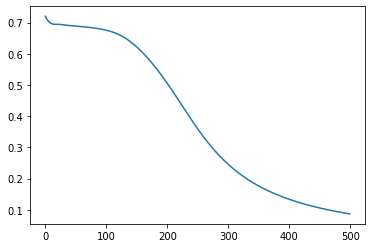

In [ ]:
plt.plot(Loss)
plt.show()

In [ ]:
|